In [ ]:
# EDA - Exploratory Data Analysis - performed on the given dataset
# This dataset contains information about individuals, including their ID, age, gender, height, weight, body mass index (BMI), and label.
# ID: A unique identifier for each individual.
# Age: The age of the individual in years.
# Gender: The gender of the individual (Male or Female).
# Height: The height of the individual in centimeters.
# Weight: The weight of the individual in kilograms.
# BMI: The body mass index (BMI) of the individual, calculated as weight (kg) divided by height squared (m^2).
# Label: A categorical label indicating the weight category of the individual (e.g., Normal Weight, Overweight, Underweight, Obese).
# The dataset contains a total of 109 records (rows), each representing an individual, and 7 columns. 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('Obesity_Classification.csv')

In [5]:
data.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [7]:
data.describe()

,ID,Age,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,56.046296,46.555556,166.574074,59.490741,20.549074
std,31.917939,24.720620,27.873615,28.856233,7.583818
min,1.000000,11.000000,120.000000,10.000000,3.900000
25%,28.750000,27.000000,140.000000,35.000000,16.700000
50%,56.500000,42.500000,175.000000,55.000000,21.200000
75%,83.250000,59.250000,190.000000,85.000000,26.100000
max,110.000000,112.000000,210.000000,120.000000,37.200000


In [8]:
data.shape

(108, 7)

In [9]:
data.isna().sum()

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

In [10]:
label_encoder_obj = LabelEncoder()

In [11]:
data.iloc[:,2] = label_encoder_obj.fit_transform(data.iloc[:,2])

In [12]:
data

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,1,175,80,25.3,Normal Weight
1,2,30,0,160,60,22.5,Normal Weight
2,3,35,1,180,90,27.3,Overweight
3,4,40,0,150,50,20.0,Underweight
4,5,45,1,190,100,31.2,Obese
...,...,...,...,...,...,...,...
103,106,11,1,175,10,3.9,Underweight
104,107,16,0,160,10,3.9,Underweight
105,108,21,1,180,15,5.6,Underweight
106,109,26,0,150,15,5.6,Underweight


In [13]:
data['Gender'].unique()

array([1, 0], dtype=object)

In [14]:
data['Label'].unique()

array(['Normal Weight', 'Overweight', 'Underweight', 'Obese'],
      dtype=object)

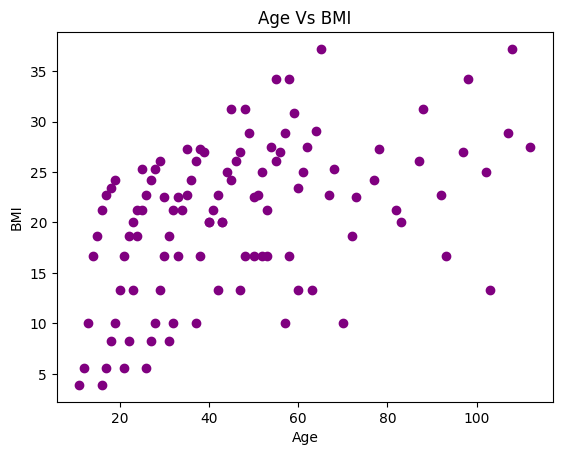

In [15]:
plt.scatter(data['Age'],data['BMI'], color = 'purple')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Age Vs BMI')
plt.show()

Text(0.5, 1.0, 'Bar Graph of Obese Types')

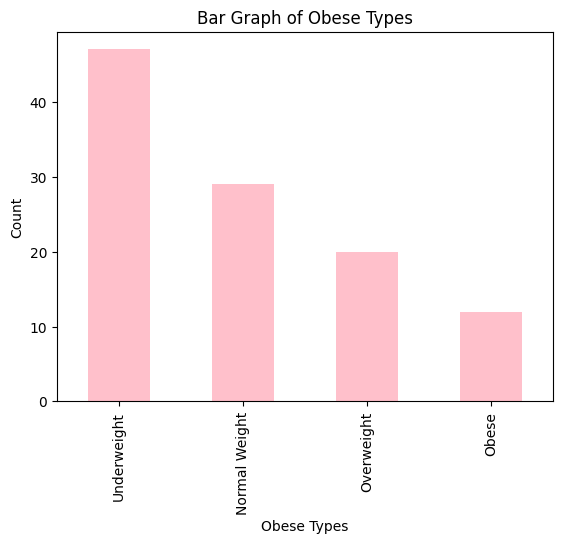

In [17]:
obese_types = data['Label'].value_counts()
obese_types.plot(kind='bar', color = 'pink')
plt.xlabel('Obese Types')
plt.ylabel('Count')
plt.title('Bar Graph of Obese Types')

In [22]:
import seaborn as sns

C:\Users\aditi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


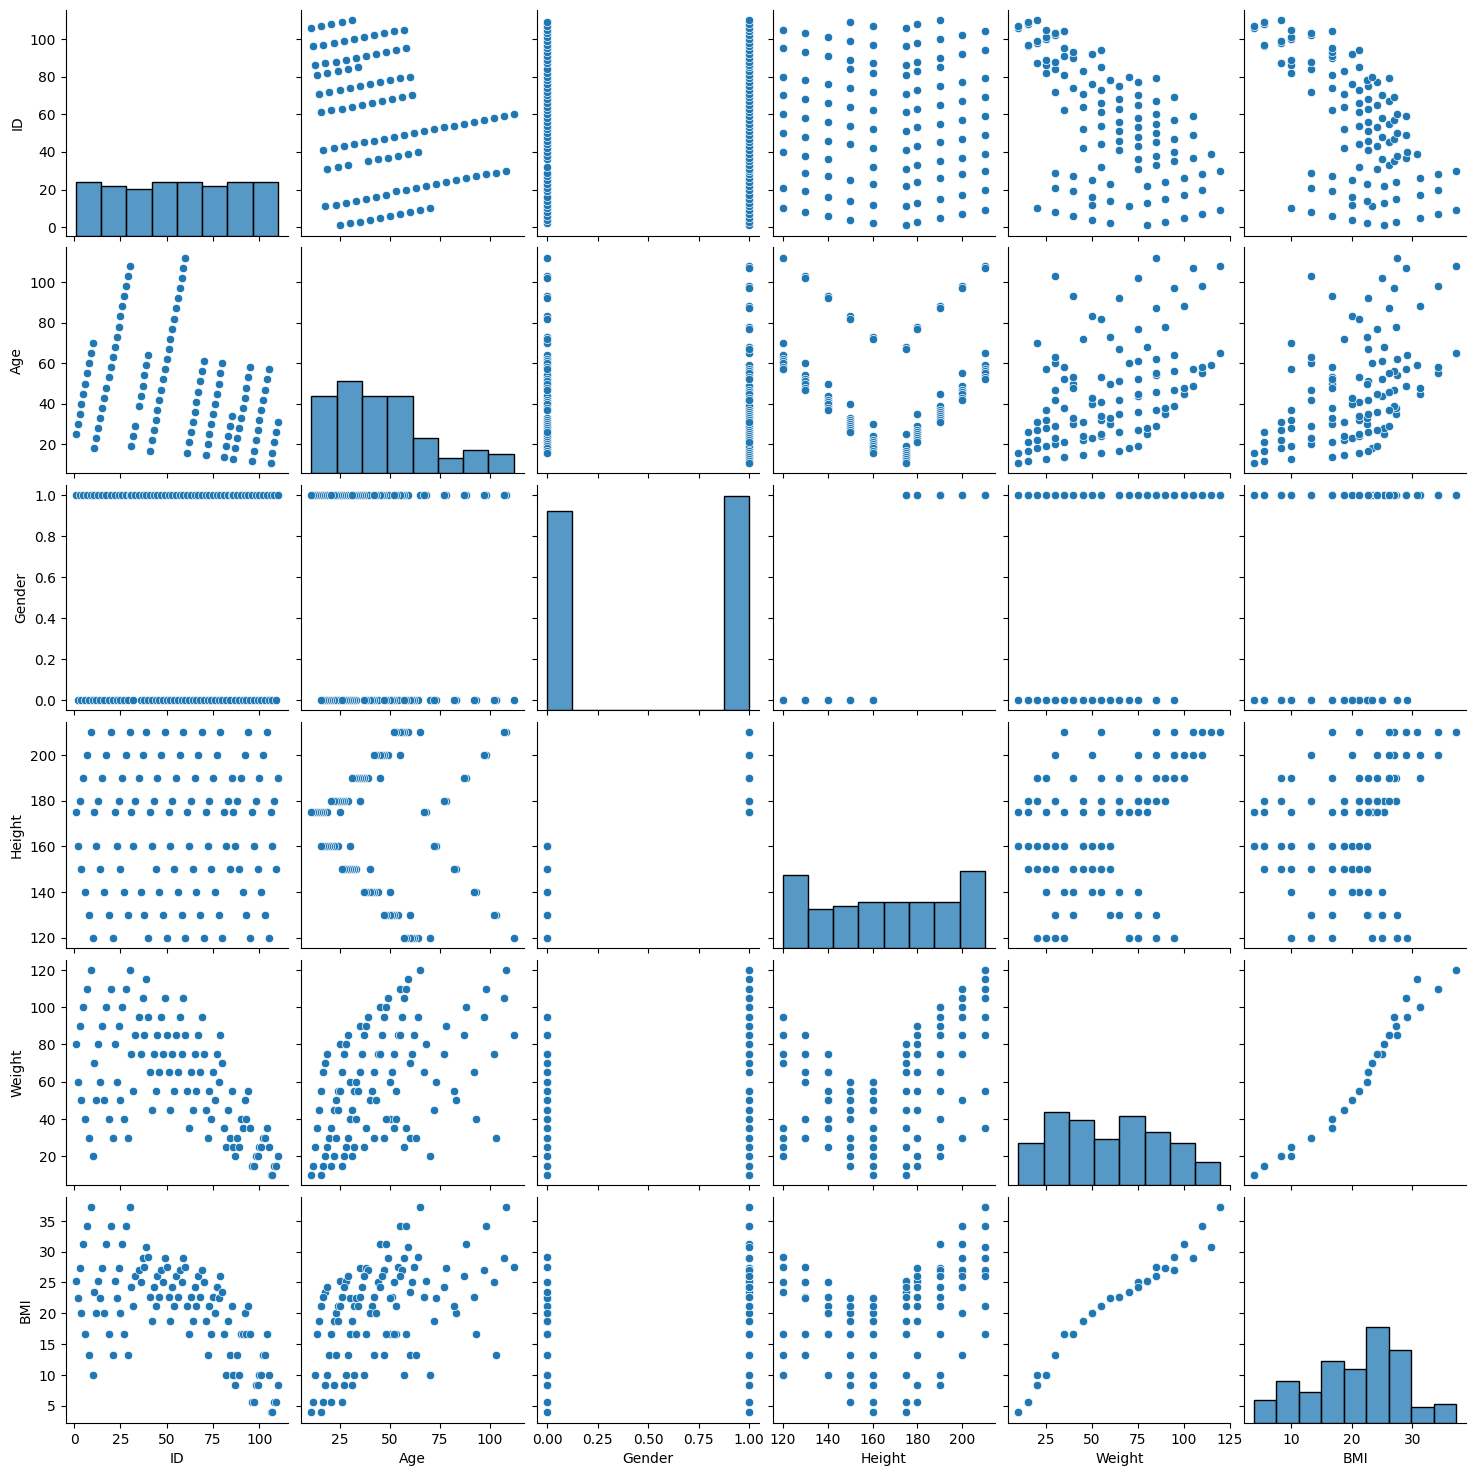

In [24]:
sns.pairplot(data) 

In [25]:
std_scaler_obj = StandardScaler()

In [26]:
data.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,1,175,80,25.3,Normal Weight
1,2,30,0,160,60,22.5,Normal Weight
2,3,35,1,180,90,27.3,Overweight
3,4,40,0,150,50,20.0,Underweight
4,5,45,1,190,100,31.2,Obese


In [27]:
data['Height'] = std_scaler_obj.fit_transform(data['Height'].values.reshape(-1,1))

In [28]:
data['Weight'] = std_scaler_obj.fit_transform(data['Weight'].values.reshape(-1,1))

In [29]:
data.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,1,0.303700,0.714053,25.3,Normal Weight
1,2,30,0,-0.236952,0.017730,22.5,Normal Weight
2,3,35,1,0.483917,1.062214,27.3,Overweight
3,4,40,0,-0.597387,-0.330431,20.0,Underweight
4,5,45,1,0.844352,1.410375,31.2,Obese


In [31]:
data['Label'] = label_encoder_obj.fit_transform(data['Label'])

In [32]:
data.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,1,0.303700,0.714053,25.3,0
1,2,30,0,-0.236952,0.017730,22.5,0
2,3,35,1,0.483917,1.062214,27.3,2
3,4,40,0,-0.597387,-0.330431,20.0,3
4,5,45,1,0.844352,1.410375,31.2,1


In [33]:
y = data['Label']
x = data.drop('Label',axis=1)

In [34]:
x

,ID,Age,Gender,Height,Weight,BMI
0,1,25,1,0.303700,0.714053,25.3
1,2,30,0,-0.236952,0.017730,22.5
2,3,35,1,0.483917,1.062214,27.3
3,4,40,0,-0.597387,-0.330431,20.0
4,5,45,1,0.844352,1.410375,31.2
...,...,...,...,...,...,...
103,106,11,1,0.303700,-1.723076,3.9
104,107,16,0,-0.236952,-1.723076,3.9
105,108,21,1,0.483917,-1.548995,5.6
106,109,26,0,-0.597387,-1.548995,5.6


In [35]:
y

0      0
1      0
2      2
3      3
4      1
      ..
103    3
104    3
105    3
106    3
107    3
Name: Label, Length: 108, dtype: int32

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state = 0)

In [38]:
x_train.shape

(81, 6)

In [39]:
y_train.shape

(81,)

In [40]:
x_test.shape

(27, 6)